# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Importing Dataset

In [2]:
dataset = pd.read_csv("/content/Fraud_check (1).csv")

In [3]:
dataset.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
dataset.tail(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

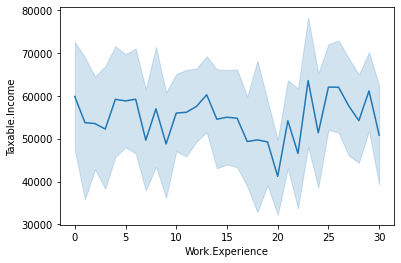

In [5]:
import seaborn as sns
sns.lineplot( dataset['Work.Experience'],dataset['Taxable.Income'])

<AxesSubplot:xlabel='Marital.Status', ylabel='Taxable.Income'>

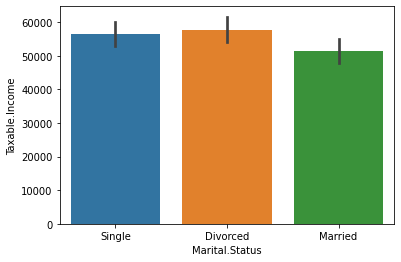

In [6]:
sns.barplot(x="Marital.Status", y="Taxable.Income", data=dataset)

<AxesSubplot:xlabel='Undergrad', ylabel='Taxable.Income'>

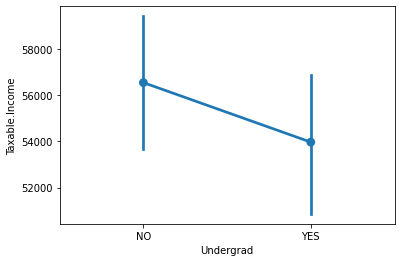

In [7]:
sns.pointplot(x="Undergrad", y="Taxable.Income", data=dataset)

<AxesSubplot:xlabel='Urban', ylabel='count'>

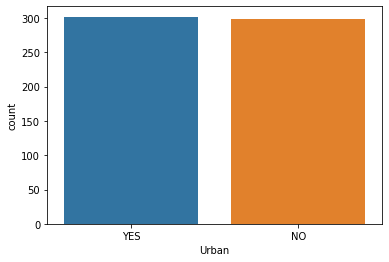

In [8]:
sns.countplot(x="Urban", data=dataset)

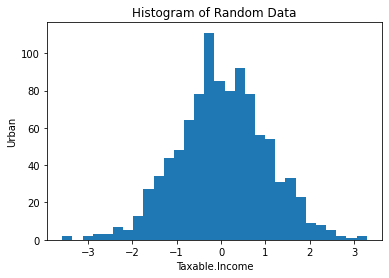

In [41]:
x = np.random.randn(1000)
plt.hist(x, bins=30)
plt.title("Histogram of Random Data")
plt.xlabel("Taxable.Income")
plt.ylabel("Urban")
plt.show()

In [9]:
#assigning catagorical values to the Taxable .Income column.
dataset['Taxable.Income']=dataset['Taxable.Income'].apply(lambda x:'Good' if x >=30000 else 'Risky')

In [10]:
dataset

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [11]:
dataset.tail(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
580,YES,Divorced,Good,123335,1,YES
581,YES,Divorced,Good,57473,10,YES
582,YES,Married,Good,32907,12,YES
583,NO,Married,Good,28874,19,NO
584,NO,Divorced,Good,155684,4,YES
585,NO,Single,Good,137622,2,YES
586,YES,Single,Good,106230,30,NO
587,NO,Single,Good,154677,26,YES
588,YES,Married,Good,93242,27,YES
589,YES,Married,Good,30774,10,NO


In [12]:
print(dataset['Marital.Status'].unique())
print(dataset['Urban'].unique())
print(dataset['Taxable.Income'].unique())

['Single' 'Divorced' 'Married']
['YES' 'NO']
['Good' 'Risky']


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


#Encoding Categorical Data

In [14]:
#give no. to the Taxable income name.
order={'Taxable.Income':{'Risky':0,'Good':1}}
dataset=dataset.replace(order)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [16]:
dataset=pd.get_dummies(dataset,columns=['Marital.Status','Urban'],drop_first=True)

In [17]:
dataset=pd.get_dummies(dataset,columns=['Undergrad'],drop_first=True)

In [18]:
dataset

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Marital.Status_Single,Urban_YES,Undergrad_YES
0,1,50047,10,0,1,1,0
1,1,134075,18,0,0,1,1
2,1,160205,30,1,0,1,0
3,1,193264,15,0,1,1,1
4,1,27533,28,1,0,0,0
...,...,...,...,...,...,...,...
595,1,39492,7,0,0,1,1
596,1,55369,2,0,0,1,1
597,1,154058,0,0,0,1,0
598,1,180083,17,1,0,0,1


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Marital.Status_Married  600 non-null    uint8
 4   Marital.Status_Single   600 non-null    uint8
 5   Urban_YES               600 non-null    uint8
 6   Undergrad_YES           600 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 16.5 KB


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Marital.Status_Married  600 non-null    uint8
 4   Marital.Status_Single   600 non-null    uint8
 5   Urban_YES               600 non-null    uint8
 6   Undergrad_YES           600 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 16.5 KB


# Independent and Dependent Variables

In [21]:
y=dataset.iloc[:,0].values
X=dataset.iloc[:,1:7].values

# Splitting the Dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [23]:
X_train

array([[137346,     27,      1,      0,      1,      1],
       [ 69386,     21,      1,      0,      1,      1],
       [110892,     18,      0,      1,      1,      1],
       ...,
       [157299,     11,      0,      1,      0,      1],
       [126556,     10,      1,      0,      1,      1],
       [180424,     26,      0,      0,      0,      1]])

In [24]:
y_train

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,

# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# MACHINE LEARNING ALGORITHM

#Random forest 

In [26]:
#Fitting the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [27]:
#Predict my test results
y_pred = rfc.predict(X_test)

In [28]:
rfc.score(X_train,y_train)

1.0

In [29]:
rfc.score(X_test,y_test)

0.7266666666666667

#Validation

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[2,4,8,10,None],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [31]:
gsc = GridSearchCV(rfc,param_grid=param_grid)

In [32]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [33]:
gsc.best_params_

{'max_depth': 2, 'max_features': 0.25, 'min_samples_split': 0.25}

In [46]:
RandomForestClassifier,
rfc2=RandomForestClassifier(max_depth=2,max_features=0.25,min_samples_split=0.25)
rfc2.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=0.25, min_samples_split=0.25)

In [35]:
rfc2.score(X_train,y_train)

0.8066666666666666

In [36]:
rfc2.score(X_test,y_test)

0.7533333333333333

#Model2 with handling imbalance data

In [50]:
# Handle class imbalance with oversampling
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=0)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [51]:
RandomForestClassifier,
rfc3=RandomForestClassifier(max_depth=2,max_features=0.25,min_samples_split=0.25)
rfc3.fit(X_resampled,y_resampled)

RandomForestClassifier(max_depth=2, max_features=0.25, min_samples_split=0.25)

In [52]:
rfc3.score(X_train,y_train)

0.56

In [53]:
rfc3.score(X_test,y_test)

0.48

In [55]:
from prettytable import PrettyTable
scoreTable =PrettyTable(['Model','train_score','test_score'])
scoreTable.add_row(['MOdel1','1.0','0.7266'])
scoreTable.add_row(['Tuned','0.8066','0.7533'])
scoreTable.add_row(['Model2','0.56','0.48'])

print(scoreTable)

+--------+-------------+------------+
| Model  | train_score | test_score |
+--------+-------------+------------+
| MOdel1 |     1.0     |   0.7266   |
| Tuned  |    0.8066   |   0.7533   |
| Model2 |     0.56    |    0.48    |
+--------+-------------+------------+


In model 1 and model 2 gap between the train score and test are more , on the other hand in Tuned model this gap very less ,so, it  definely will give good prediction as compared to without Tuned. 